In [2]:
!pip install tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [29]:
df = pd.read_csv("clean_data.csv")

In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [31]:
x = df.iloc[:,:19]
y = df.iloc[:,-1:]

In [32]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = x.select_dtypes(include='object').columns
numerical_cols = x.select_dtypes(exclude='object').columns

In [33]:
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [34]:
numerical_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [35]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder',OneHotEncoder(categories='auto'))
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [36]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder())]),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [37]:
## Train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [38]:
x_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
x_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [39]:
from imblearn.over_sampling import SMOTE

In [127]:
# create ANN


In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [129]:
### lets initialize ANN
classifier = Sequential()

In [130]:
## Adding input
classifier.add(Dense(units=45,activation="relu"))

In [131]:
## Adding first hidden layer
classifier.add(Dense(units=20,activation="relu"))
classifier.add(Dropout(0.20))

In [132]:
## Adding second hidden layer
classifier.add(Dense(units=10,activation="relu"))
classifier.add(Dropout(0.20))

In [133]:
## Adding third hidden layer
classifier.add(Dense(units=5,activation="relu"))
classifier.add(Dropout(0.20))

In [134]:
## Adding output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [138]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [139]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [140]:
## Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [141]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)


Epoch 1/1000
331/331 [==============================] - 9s 13ms/step - loss: 0.4988 - accuracy: 0.7548 - val_loss: 0.4478 - val_accuracy: 0.7996
Epoch 2/1000
331/331 [==============================] - 3s 10ms/step - loss: 0.4600 - accuracy: 0.7717 - val_loss: 0.4456 - val_accuracy: 0.8027
Epoch 3/1000
331/331 [==============================] - 5s 14ms/step - loss: 0.4407 - accuracy: 0.7838 - val_loss: 0.4442 - val_accuracy: 0.7966
Epoch 4/1000
331/331 [==============================] - 4s 13ms/step - loss: 0.4418 - accuracy: 0.7829 - val_loss: 0.4362 - val_accuracy: 0.7984
Epoch 5/1000
331/331 [==============================] - 2s 6ms/step - loss: 0.4263 - accuracy: 0.7941 - val_loss: 0.4393 - val_accuracy: 0.7996


In [142]:
model_history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

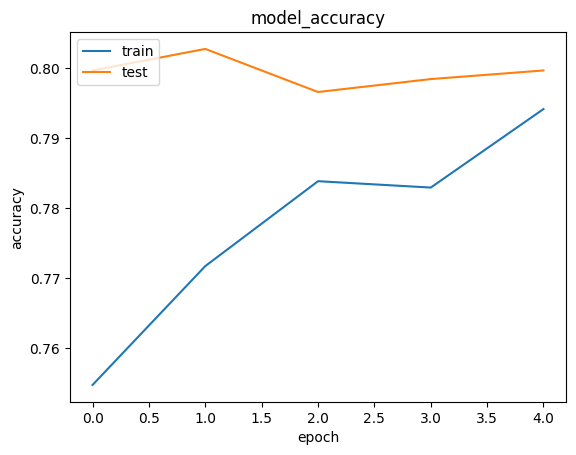

In [143]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="upper left")
plt.show()

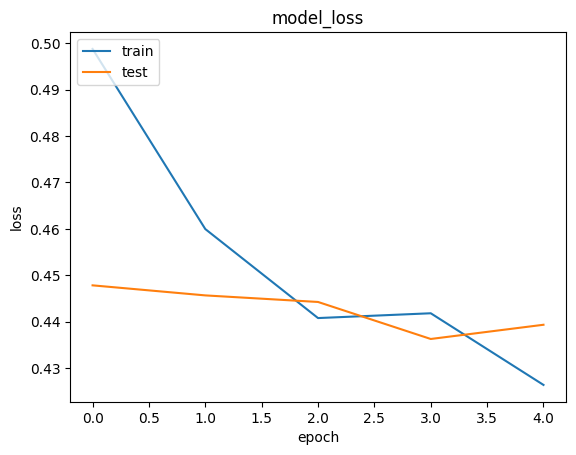

In [144]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [145]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

67/67 [==============================] - 1s 11ms/step


In [146]:
## make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1314,  185],
       [ 270,  344]])

In [147]:
## calculate Accuracy
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.88      0.83      0.85      1584
        True       0.56      0.65      0.60       529

    accuracy                           0.78      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.80      0.78      0.79      2113



In [149]:
## gets weights
classifier.get_weights

<bound method Model.get_weights of <keras.engine.sequential.Sequential object at 0x7e08ae450e20>>